In [2]:
import json
import pandas as pd

In [5]:
df = pd.DataFrame(columns=["Model", "MEN", "WS353", "SimLex", "loss"])

In [6]:
with open("/home/z1079621/storage/embeddings/results/esim_to_restore/restorer_results.json") as f:
    data = json.load(f)
    
parsed_data = {}
for k, v in data.items():
    s, num = k.split('_')
    new_k = "%s_%02d" % (s, int(num))
#     new_k = new_k.replace("epoch_00", "_original_glove")
    parsed_data[new_k] = v

In [7]:
original_glove = {
    "MEN": 0.7793,
    "SimLex999": 0.3691,
    "WS353": 0.5714
}

df = pd.DataFrame.from_dict(parsed_data).T.sort_index()
df

,MEN,SimLex999,WS353,loss
epoch_00,0.778952,0.366717,0.567737,2.005297
epoch_01,0.764275,0.326739,0.499154,12.195054
epoch_02,0.771387,0.330414,0.495495,12.088985
epoch_03,0.773173,0.331868,0.491391,13.058824
epoch_04,0.774171,0.340038,0.493618,11.720707
epoch_05,0.772383,0.343927,0.503532,13.756411
epoch_06,0.774959,0.338378,0.497016,12.141936
epoch_07,0.776960,0.339139,0.491575,13.283145
epoch_08,0.776209,0.340692,0.504684,14.046845
epoch_09,0.771089,0.340717,0.498053,14.652857


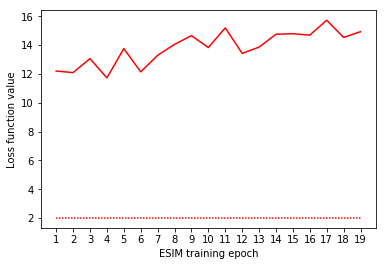

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(1, 1+epochs), df['loss'].values[1:epochs+1], label='Restorer validation loss', color='r')
ax.plot(range(1, 1+epochs), epochs * [df['loss'][0]], dashes=[1, 1], color='r')
plt.xticks(range(1, 1+epochs))
plt.xlabel("ESIM training epoch")
plt.ylabel("Loss function value")
# plt.legend()
plt.show()

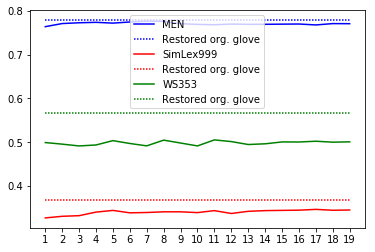

In [15]:
fig, ax = plt.subplots()
epochs = 19
for column, color in zip(['MEN', 'SimLex999', 'WS353'], ['b', 'r', 'g']):
    ax.plot(range(1, 1+epochs), df[column].values[1:epochs+1], label=column, color=color)
    ax.plot(range(1, 1+epochs), epochs * [df[column][0]], dashes=[1, 1], color=color, label='Restored org. glove')
    
plt.xticks(range(1, epochs+1))
plt.legend()